# Import Libraries
<hr>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score


# Load data from csv file

In [2]:
df = pd.read_csv("class_ml.csv")

<h1>Data Visualization and Analysis</h1>

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.describe()
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

## Let's look at the distributions of some classes

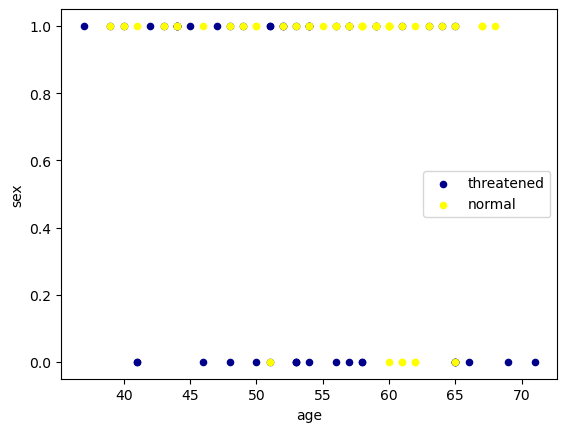

In [5]:
ax = df[df['output'] == 1][0:50].plot(kind='scatter', x='age', y='sex', color='DarkBlue', label='threatened');
df[df['output'] == 0][0:50].plot(kind='scatter', x='age', y='sex', color='Yellow', label='normal', ax=ax);
plt.show()

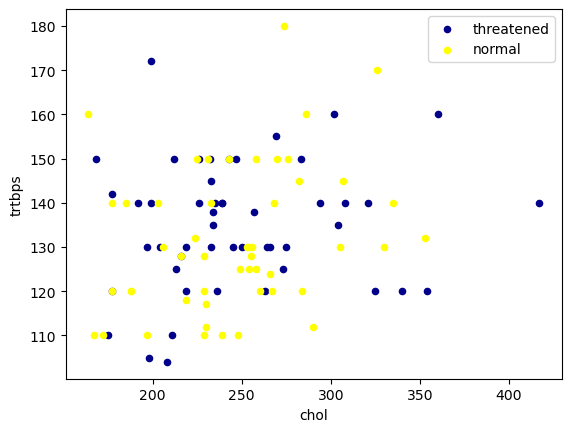

In [6]:
ax = df[df['output'] == 1][0:50].plot(kind='scatter', x='chol', y='trtbps', color='DarkBlue', label='threatened');
df[df['output'] == 0][0:50].plot(kind='scatter', x='chol', y='trtbps', color='Yellow', label='normal', ax=ax);
plt.show()

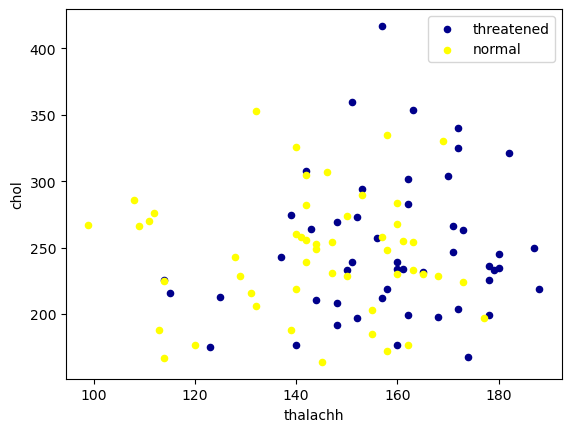

In [7]:
ax = df[df['output'] == 1][0:50].plot(kind='scatter', x='thalachh', y='chol', color='DarkBlue', label='threatened');
df[df['output'] == 0][0:50].plot(kind='scatter', x='thalachh', y='chol', color='Yellow', label='normal',ax=ax);
plt.show()

# Define feature sets

In [8]:
features = df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh","exng", "oldpeak", "slp", "caa", "thall"]]
X = np.asarray(features)
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [9]:
Y = np.asarray(df["output"])
Y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Train & Test split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.17, random_state = 5)
print ("Train: ", x_train.shape, y_train.shape)
print ("Test: ", x_test.shape, y_test.shape)

Train:  (251, 13) (251,)
Test:  (52, 13) (52,)


<h1>Classification:</h1>
<br>
<h2>SVM Support Vector Machine</h2>


In [11]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

# Prediction

In [12]:
yhat = svm_model.predict(x_test)
print (yhat[:5])
print(y_test[:5])

[1 0 0 0 1]
[0 0 0 0 1]


# Defining a function to plot confusion matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Use the plot_confusion_matrix function to plot a cnf base on our data

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.92      0.88      0.90        25

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.90      0.90      0.90        52

Confusion matrix, without normalization
[[25  2]
 [ 3 22]]


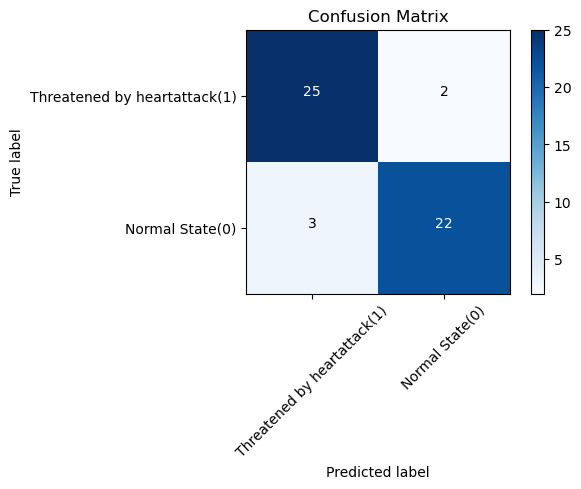

In [14]:
conf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
print(classification_report(y_test,yhat))
plot_confusion_matrix (conf_matrix, classes=["Threatened by heartattack(1)","Normal State(0)"], normalize = False, title = "Confusion Matrix")

# Evaluate base on f1_score

In [15]:
f1_score(y_test, yhat, average='weighted')

0.9037391180248323

# Evaluate base on jaccard_score

### In jaccard_score evaluation we cac get the percentage of our success!

in this model, 81.4% of situations the model is predictinc great without any kind of problem.

In [16]:
jaccard_score (y_test, yhat, pos_label=1)

0.8148148148148148